In [6]:
from numpy import ndarray
from pandas import DataFrame, read_csv, unique
from matplotlib.pyplot import figure, subplots, savefig, show
from sklearn.ensemble import RandomForestClassifier
from libs.ds_charts import plot_evaluation_results, multiple_line_chart, horizontal_bar_chart, HEIGHT
from sklearn.metrics import accuracy_score, f1_score

### Random Trees Study

5
10
25
50
75
100
150
200
250
300
5
10
25
50
75
100
150
200
250
300
5
10
25
50
75
100
150
200
250
300
5
10
25
50
75
100
150
200
250
300
5
10
25
50
75
100
150
200
250
300
5
10
25
50
75
100
150
200
250
300
5
10
25
50
75
100
150
200
250
300
5
10
25
50
75
100
150
200
250
300
5
10
25
50
75
100
150
200
250
300
5
10
25
50
75
100
150
200
250
300
5
10
25
50
75
100
150
200
250
300
5
10
25
50
75
100
150
200
250
300
5
10
25
50
75
100
150
200
250
300
5
10
25
50
75
100
150
200
250
300
5
10
25
50
75
100
150
200
250
300
5
10
25
50
75
100
150
200
250
300
5
10
25
50
75
100
150
200
250
300
5
10
25
50
75
100
150
200
250
300


<Figure size 600x450 with 0 Axes>

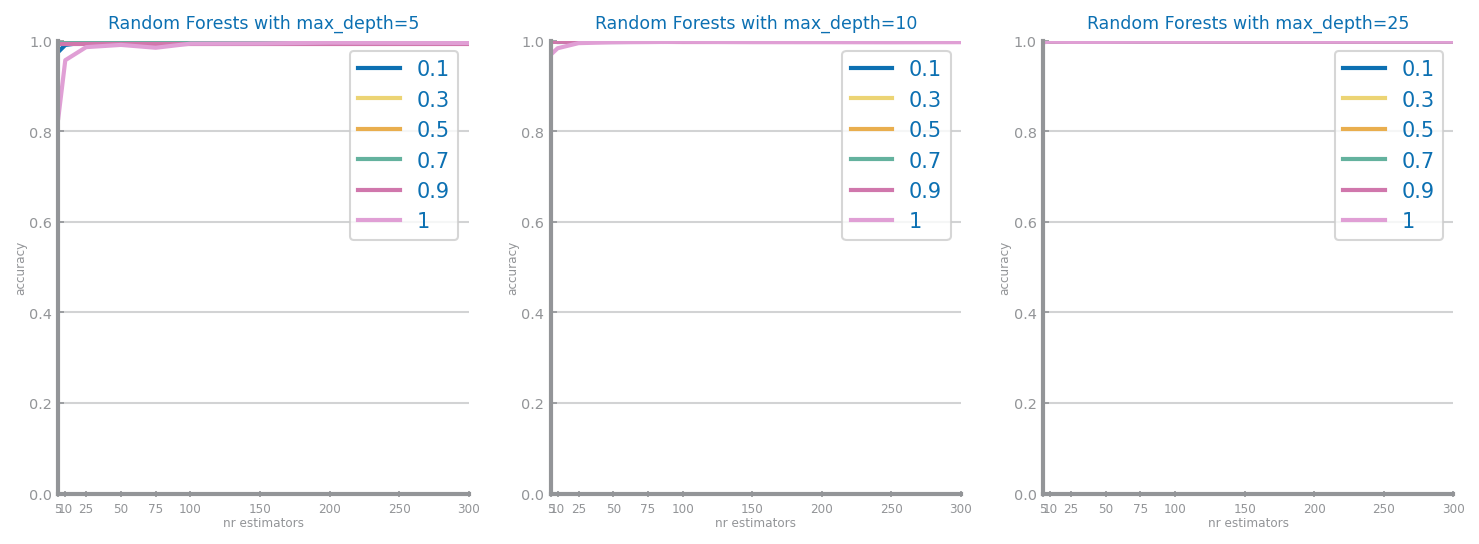

Best results with depth=25, 0.30 features and 50 estimators, with accuracy=1.00


In [4]:
file_tag = 'nyc_collisions_scaled_zscore'
filename = 'data/nyc_collisions_scaled_zscore'
target = 'PERSON_INJURY'


train: DataFrame = read_csv(f'{filename}_train_smote.csv')
trnY: ndarray = train.pop(target).values
trnX: ndarray = train.values
labels = unique(trnY)
labels.sort()

test: DataFrame = read_csv(f'{filename}_test.csv')
tstY: ndarray = test.pop(target).values
tstX: ndarray = test.values

## ACCURACY

n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [5, 10, 25]
max_features = [.1, .3, .5, .7, .9, 1]

cols = len(max_depths)
figure()
fig, axs = subplots(1, cols, figsize=(cols*HEIGHT, HEIGHT), squeeze=False)
for k in range(len(max_depths)):
    d = max_depths[k]
    values = {}
    for f in max_features:
        yvalues = []
        for n in n_estimators:
            print(n)
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f)
            rf.fit(trnX, trnY)
            prdY = rf.predict(tstX)
            yvalues.append(accuracy_score(tstY, prdY))

        values[f] = yvalues
    multiple_line_chart(n_estimators, values, ax=axs[0, k], title=f'Random Forests with max_depth={d}',
                           xlabel='nr estimators', ylabel='accuracy', percentage=True)
savefig(f'lab6_images/{file_tag}_rf_acc_study.png')
show()


0
1
2


<Figure size 600x450 with 0 Axes>

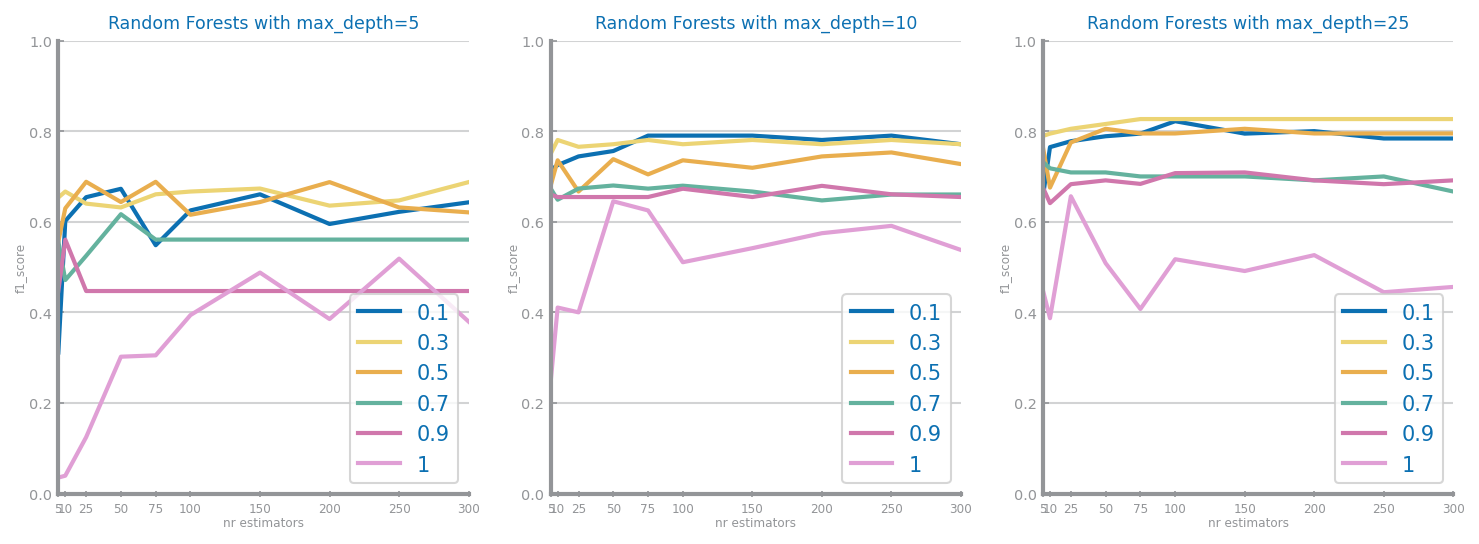

Best results with depth=25, 0.30 features and 75 estimators, with f1=0.83


In [7]:
## F1_SCORE

_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [5, 10, 25]
max_features = [.1, .3, .5, .7, .9, 1]
best = ('', 0, 0)
last_best = 0
best_model = None

cols = len(max_depths)
figure()
fig, axs = subplots(1, cols, figsize=(cols*HEIGHT, HEIGHT), squeeze=False)
for k in range(len(max_depths)):
    print(k)
    d = max_depths[k]
    values = {}
    for f in max_features:
        yvalues = []
        for n in n_estimators:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f)
            rf.fit(trnX, trnY)
            prdY = rf.predict(tstX)
            yvalues.append(f1_score(tstY, prdY, pos_label='Killed'))
            if yvalues[-1] > last_best:
                best = (d, f, n)
                last_best = yvalues[-1]
                best_model = rf

        values[f] = yvalues
    multiple_line_chart(n_estimators, values, ax=axs[0, k], title=f'Random Forests with max_depth={d}',
                           xlabel='nr estimators', ylabel='f1_score', percentage=True)
savefig(f'lab6_images/{file_tag}_rf_f1_study.png')
show()
print('Best results with depth=%d, %1.2f features and %d estimators, with f1=%1.2f'%(best[0], best[1], best[2], last_best))

### Confusion Matrix best model

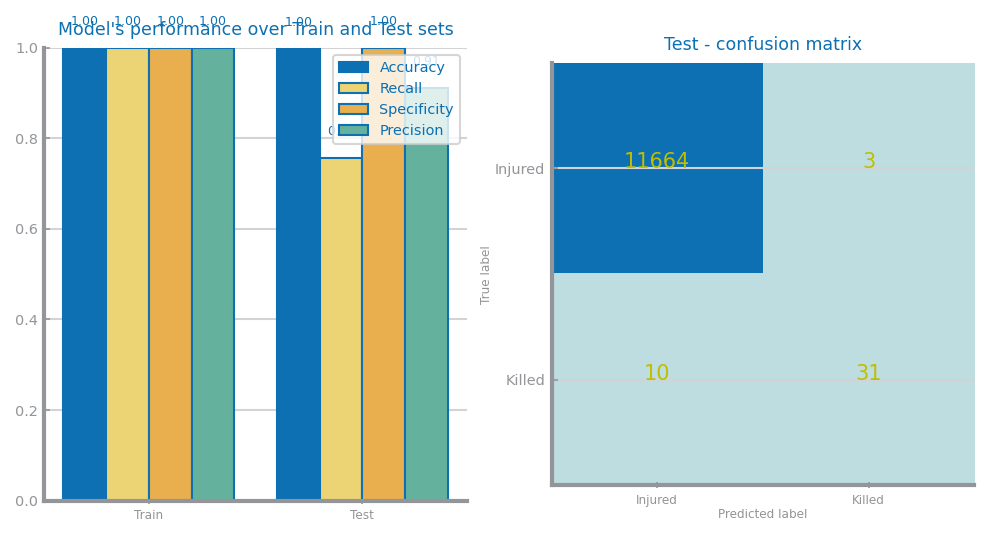

In [8]:
prd_trn = best_model.predict(trnX)
prd_tst = best_model.predict(tstX)
plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
savefig(f'lab6_images/{file_tag}_rf_d1_best.png')
show()

### Overfitting

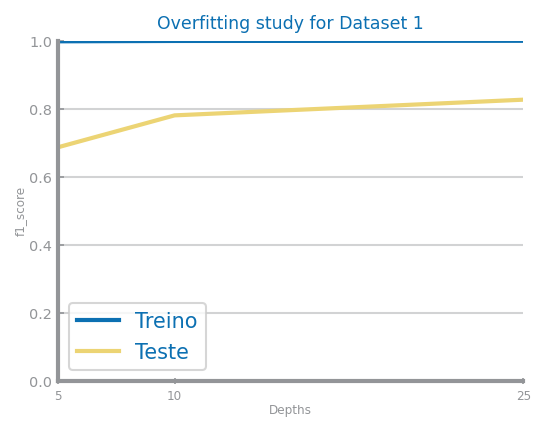

In [10]:
figure()
values = {}
yvalues = []
for imp in max_depths:
    rf = RandomForestClassifier(n_estimators= 75, max_depth=imp, max_features=0.3)
    rf.fit(trnX, trnY)
    prdY = rf.predict(trnX)
    yvalues.append(f1_score(trnY, prdY, pos_label = 'Killed'))

values['Treino'] = yvalues
yvalues = []
for imp in max_depths:
    rf = RandomForestClassifier(n_estimators=75, max_depth=imp, max_features=0.3)
    rf.fit(trnX, trnY)
    prdY = rf.predict(tstX)
    yvalues.append(f1_score(tstY, prdY, pos_label = 'Killed'))

values['Teste'] = yvalues

multiple_line_chart(max_depths, values, title=f'Overfitting study for Dataset 1',
                           xlabel='Depths', ylabel='f1_score', percentage=True)
savefig(f'lab6_images/{file_tag}_overfitting_study_d1_f1.png')
show()

### Features Importance best model

1. feature EMOTIONAL_STATUS_Conscious (0.31919841976280783)
2. feature COMPLAINT_Internal (0.24239404896812386)
3. feature EMOTIONAL_STATUS_Apparent Death (0.12955596267059963)
4. feature COMPLAINT_Complaint of Pain or Nausea (0.10218885198067115)
5. feature COMPLAINT_Crush Injuries (0.03380305634926996)
6. feature BODILY_INJURY_Head (0.03163090736927771)
7. feature EMOTIONAL_STATUS_Unconscious (0.02728993899167444)
8. feature EJECTION_Not Ejected (0.02069527554493265)
9. feature EJECTION_Ejected (0.012205987824683824)
10. feature SAFETY_EQUIPMENT_Lap Belt & Harness (0.010133556654179273)
11. feature EMOTIONAL_STATUS_Unknown (0.009706377888098694)
12. feature EMOTIONAL_STATUS_Shock (0.008323856569437429)
13. feature BODILY_INJURY_Entire Body (0.007018970653968376)
14. feature SAFETY_EQUIPMENT_Helmet (Motorcycle Only) (0.0059126655309175965)
15. feature COMPLAINT_None Visible (0.005283437269840746)
16. feature PERSON_SEX_M (0.0026682010591868024)
17. feature EMOTIONAL_STATUS_Semiconscio

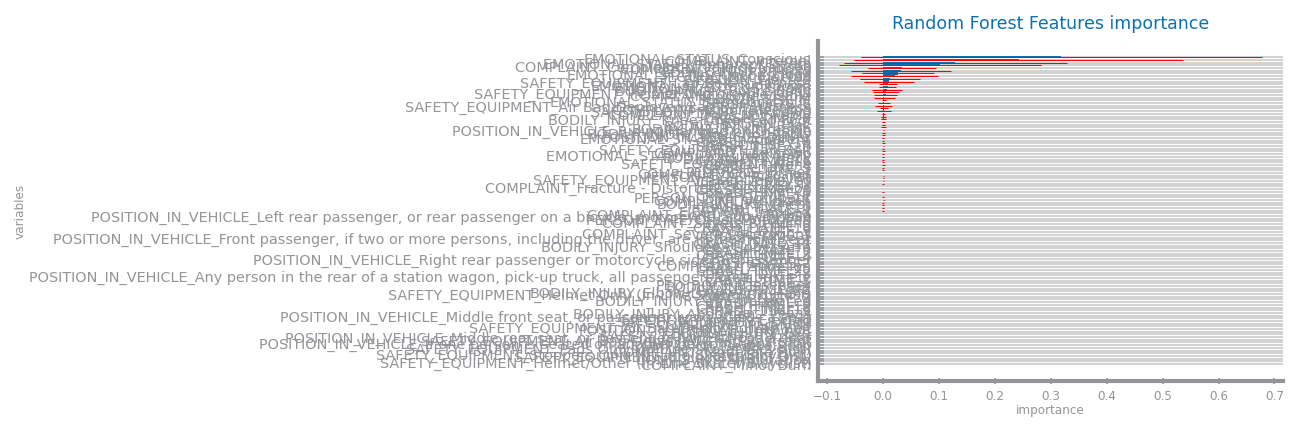

In [11]:
from numpy import std, argsort

variables = train.columns
importances = best_model.feature_importances_
stdevs = std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)
indices = argsort(importances)[::-1]
elems = []
for f in range(len(variables)):
    elems += [variables[indices[f]]]
    print(f'{f+1}. feature {elems[f]} ({importances[indices[f]]})')

figure()
horizontal_bar_chart(elems, importances[indices], stdevs[indices], title='Random Forest Features importance', xlabel='importance', ylabel='variables')
savefig(f'lab6_images/{file_tag}_rf_d1_ranking.png')